## Часть 4. Частотная фильтрация

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure
from scipy import fftpack
from matplotlib.colors import LogNorm
from scipy.ndimage import interpolation as ip

## Задание 1

Постройте изображение размером 400х400, левая половина которого черная, а правая - белая. Отобразите в окне изображение и его фурье спектр.

<img src="pictures/4pic1.png" alt="Drawing" />

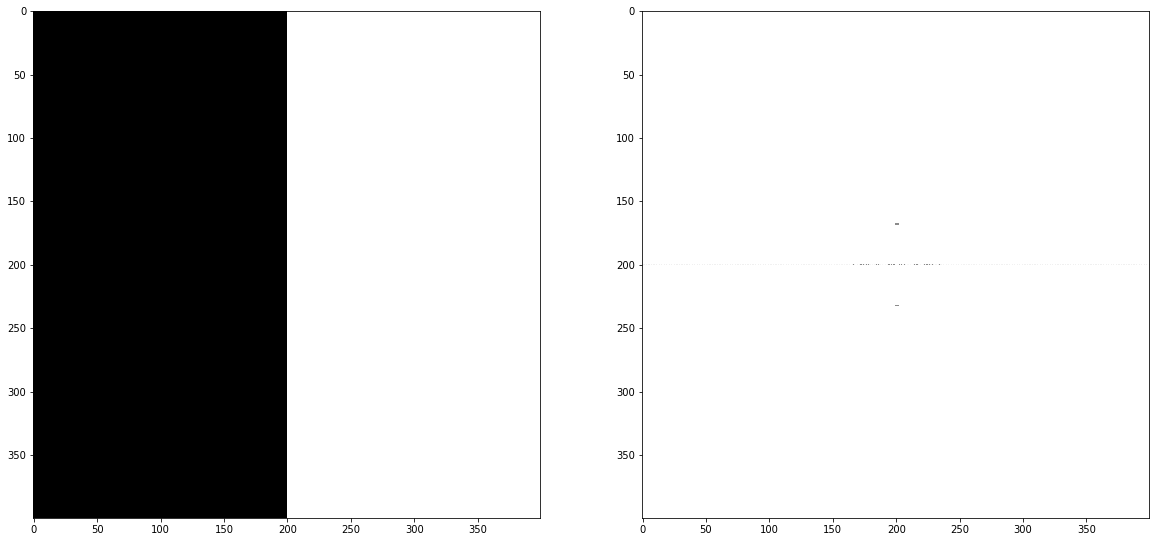

In [2]:
image = np.hstack((np.zeros((400, 200)), np.ones((400, 200))))

image_fft = fftpack.fft2(image)
image_fft_shifted = fftpack.fftshift(image_fft)
image_fft_mod = np.abs(image_fft_shifted)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(image_fft_mod, norm=LogNorm(), cmap="gray")

## Задание 2

1) Постройте изображение квадрата (как на рисунке ниже) и его Фурье-спектр
<img src="pictures/4pic2.png" alt="Drawing" />

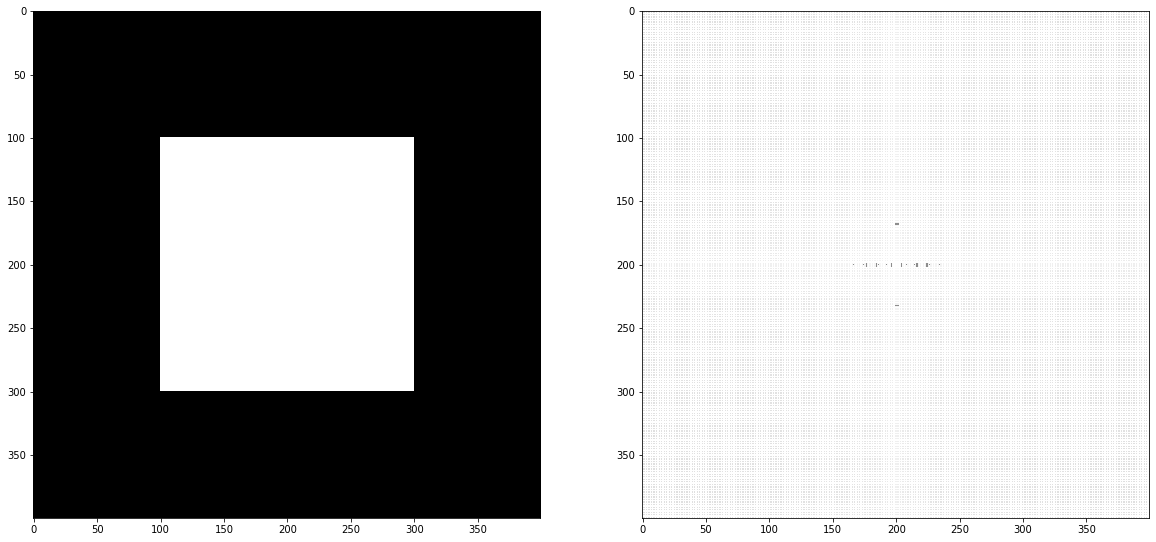

In [3]:
image = np.zeros((400, 400))
image[100:300, 100:300] = 1

image_fft = fftpack.fft2(image)
image_fft_shifted = fftpack.fftshift(image_fft)
image_fft_mod = np.abs(image_fft_shifted)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(image_fft_mod, norm=LogNorm(), cmap="gray")

2) Постройте изображение квадрата (как на рисунке ниже) и его Фурье-спектр
<img src="pictures/4pic3.png" alt="Drawing" />

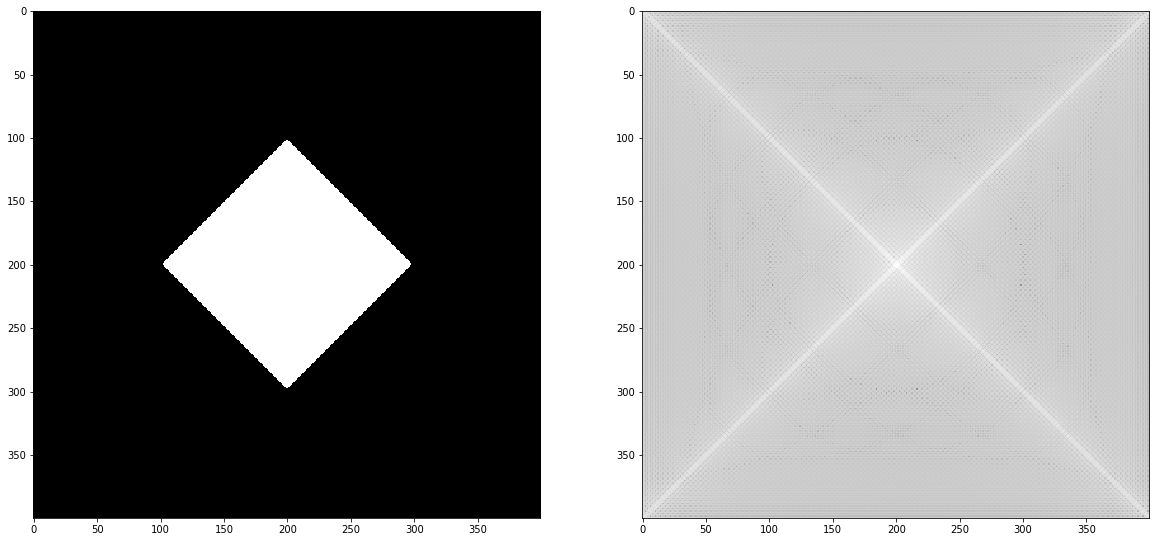

In [4]:
matrix1, matrix2 = np.meshgrid(np.arange(0, 200), np.arange(0, 200))
image = np.vectorize(lambda x, y: 1 if (x + y) > 300 else 0)(matrix1, matrix2)
tmp = np.hstack((image, np.rot90(image, 3)))
image = np.vstack((tmp, np.rot90(tmp, 2)))

image_fft = fftpack.fft2(image)
image_fft_shifted = fftpack.fftshift(image_fft)
image_fft_mod = np.abs(image_fft_shifted)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(image_fft_mod, norm=LogNorm(), cmap="gray")

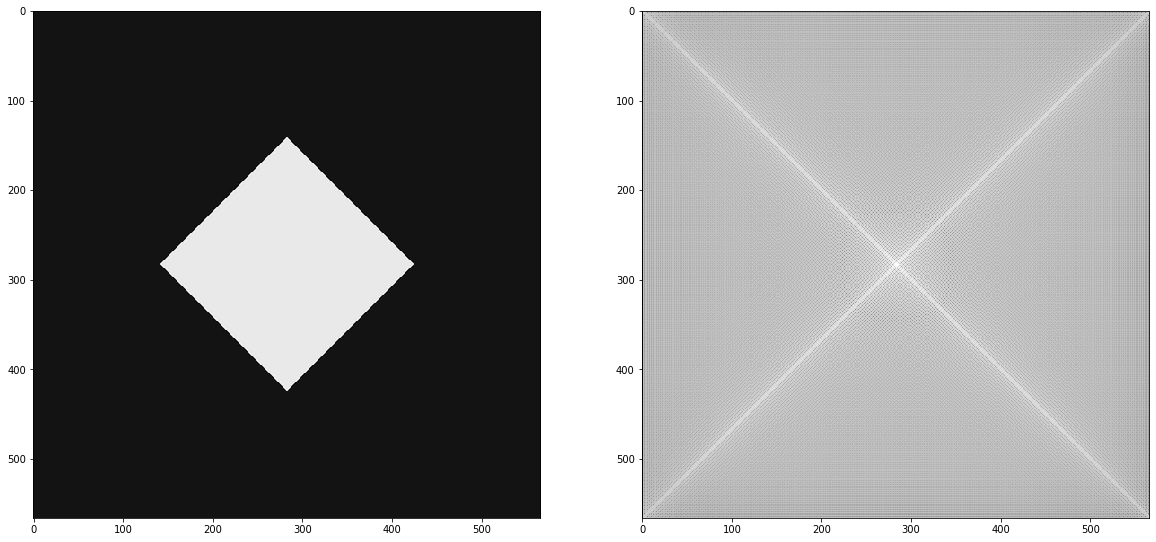

In [5]:
image = np.zeros((400, 400))
image[100:300, 100:300] = 1
image = ip.rotate(image, 45)

image_fft = fftpack.fft2(image)
image_fft_shifted = fftpack.fftshift(image_fft)
image_fft_mod = np.abs(image_fft_shifted)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(image_fft_mod, norm=LogNorm(), cmap="gray")

3) Постройте изображение квадрата (как на рисунке ниже) и его Фурье-спектр
<img src="pictures/4pic4.png" alt="Drawing" />

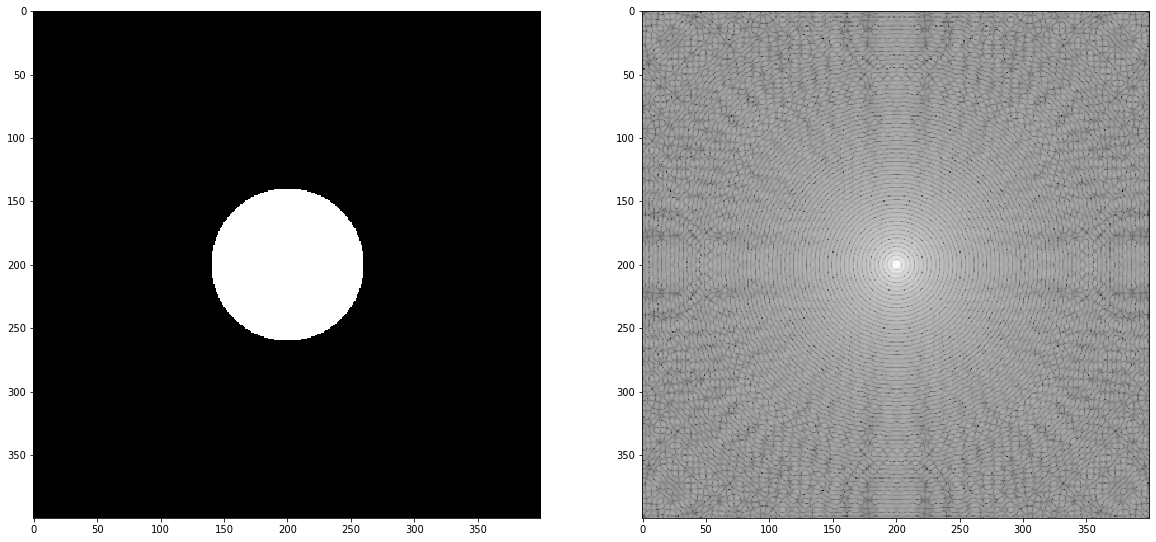

In [6]:
center = (200, 200)
radius = 60
matrix1, matrix2 = np.meshgrid(np.arange(0, 400), np.arange(0, 400))
image = np.vectorize(lambda x, y: 1 if np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2) < radius else 0)(matrix1, matrix2)

image_fft = fftpack.fft2(image)
image_fft_shifted = fftpack.fftshift(image_fft)
image_fft_mod = np.abs(image_fft_shifted)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(image_fft_mod, norm=LogNorm(), cmap="gray")

## Задание 3

Выполнив задание 2.3, Вы построили передаточную функцию для низкочастотного идеального фильтра. Модифицируйте его код, чтобы получить низкочастотный фильтр Баттерворта, определяемый формулой:
$$H(u,v) = \frac{1} {1+[D(u,v)/D_0]^2}, где$$
$D(u,v)$ - расстояние между (u,v) и (0,0); $D_0$ - константа, частота среза; $n$ - порядок фильтра.

Постройте передаточные функции низкочастотного фильтра Баттерворта для двух случаев со следующими параметрами:

- $D_0$=50 и n=1
- $D_0$=50 и n=10
- $D_0$=10 и n=1
- $D_0$=10 и n=10

Используйте получившиеся функции для фильтрации изображения `4cameraman.jpeg` в частотной области. Для каждого из радиусов выведите на экран результаты (слева направо): 
(1) исходное изображение, (2) его Фурье-спектр, (3) передаточная функция, (4) результирующее изображение.
<img src="pictures/4pic5.png" alt="Drawing" />

In [7]:
def butter(link, D0, n):
    image = color.rgb2gray(io.imread(link))

    image_fft = fftpack.fft2(image)
    image_fft_shifted = fftpack.fftshift(image_fft)
    image_fft_mod = np.abs(image_fft_shifted)
    matrix1, matrix2 = np.meshgrid(np.arange(0, image.shape[0]), np.arange(0, image.shape[1]))
    mask = np.vectorize(lambda x, y: 1 / (1 + (np.sqrt((x - image.shape[0] // 2) ** 2 + (y - image.shape[0] // 2) ** 2) / D0) ** (2 * n)))(matrix1, matrix2)
    
    image_mul_fun = mask * image_fft_shifted
    image_fft_result = fftpack.ifftshift(image_mul_fun)
    image_result = fftpack.ifft2(image_fft_result).real
    
    _, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    ax[0].imshow(image, cmap="gray")
    ax[1].imshow(image_fft_mod, norm=LogNorm(), cmap="gray")
    ax[2].imshow(mask, cmap="gray")
    ax[3].imshow(image_result, norm=LogNorm(), cmap="gray")

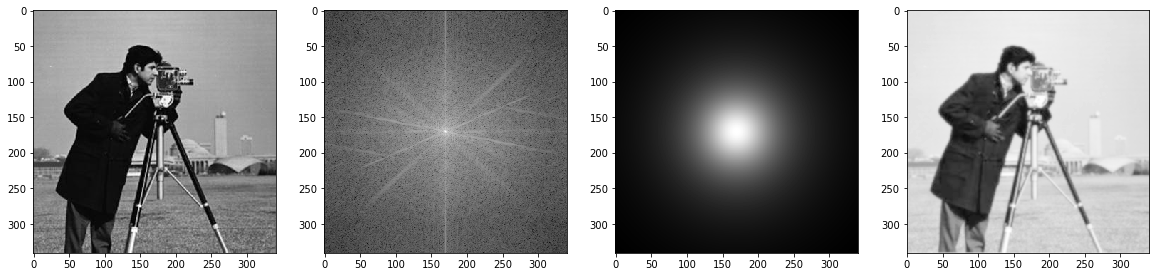

In [8]:
butter("pictures/4cameraman.jpg", 50, 1)

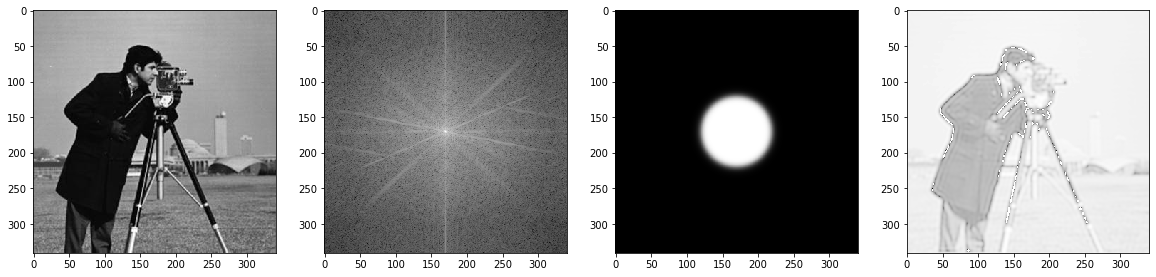

In [9]:
butter("pictures/4cameraman.jpg", 50, 10)

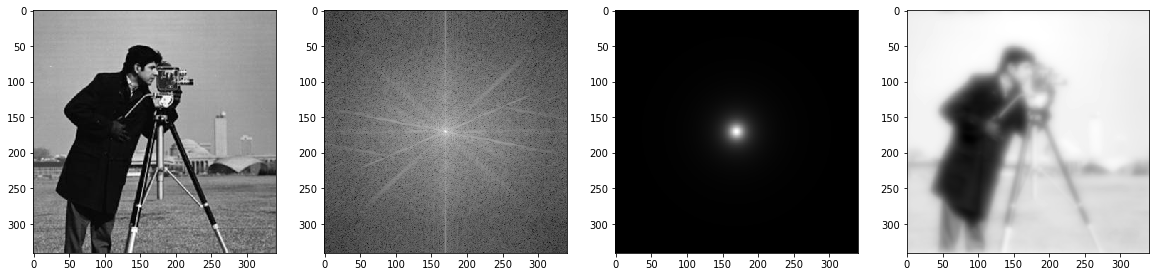

In [10]:
butter("pictures/4cameraman.jpg", 10, 1)

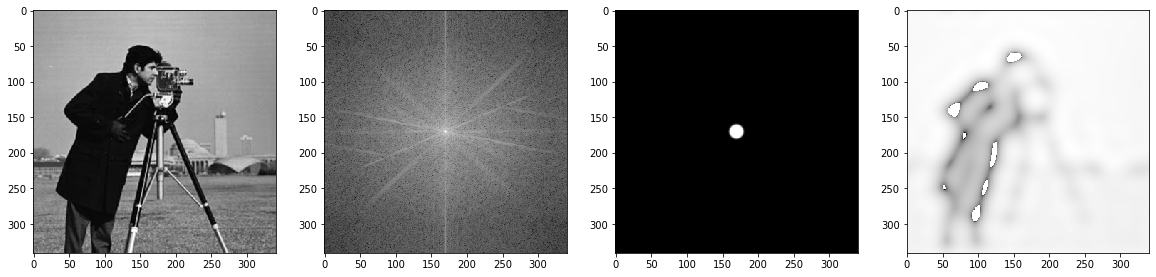

In [11]:
butter("pictures/4cameraman.jpg", 10, 10)

## Задание 4

Передаточная функция лапласиана описывается выражением:

$$ H(u,v) = -4\pi^2D^2(u,v) $$

Выполните фильтрацию изображения `4chars.tif` в частотной области с помощью передаточной функции лапласиана.

Выведите на экран передаточную функцию H(u,v) и результат фильтрации. Результат должен выглядеть следующим образом (Первоначальный результат фильтрации будет с серым фоном. Как его преобразовать, чтобы получить контуры на черном фоне подобно примеру ниже?):
<img src="4pic6.png" alt="Drawing" />

In [12]:
def laplace(link):
    image = color.rgb2gray(io.imread(link))

    image_fft = fftpack.fft2(image)
    image_fft_shifted = fftpack.fftshift(image_fft)
    image_fft_mod = np.abs(image_fft_shifted)
    matrix1, matrix2 = np.meshgrid(np.arange(0, image.shape[0]), np.arange(0, image.shape[1]))
    mask = np.vectorize(lambda x, y: -4 * np.pi ** 2 * ((x - image.shape[0] // 2) ** 2 + (y - image.shape[0] // 2) ** 2))(matrix1, matrix2)
    
    image_mul_fun = mask * image_fft_shifted
    image_fft_result = fftpack.ifftshift(image_mul_fun)
    image_result = fftpack.ifft2(image_fft_result).real
    
    _, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 40))
    ax[0].imshow(image, cmap="gray")
    ax[1].imshow(mask, cmap="gray")
    ax[2].imshow(np.abs(image_result), cmap="gray")

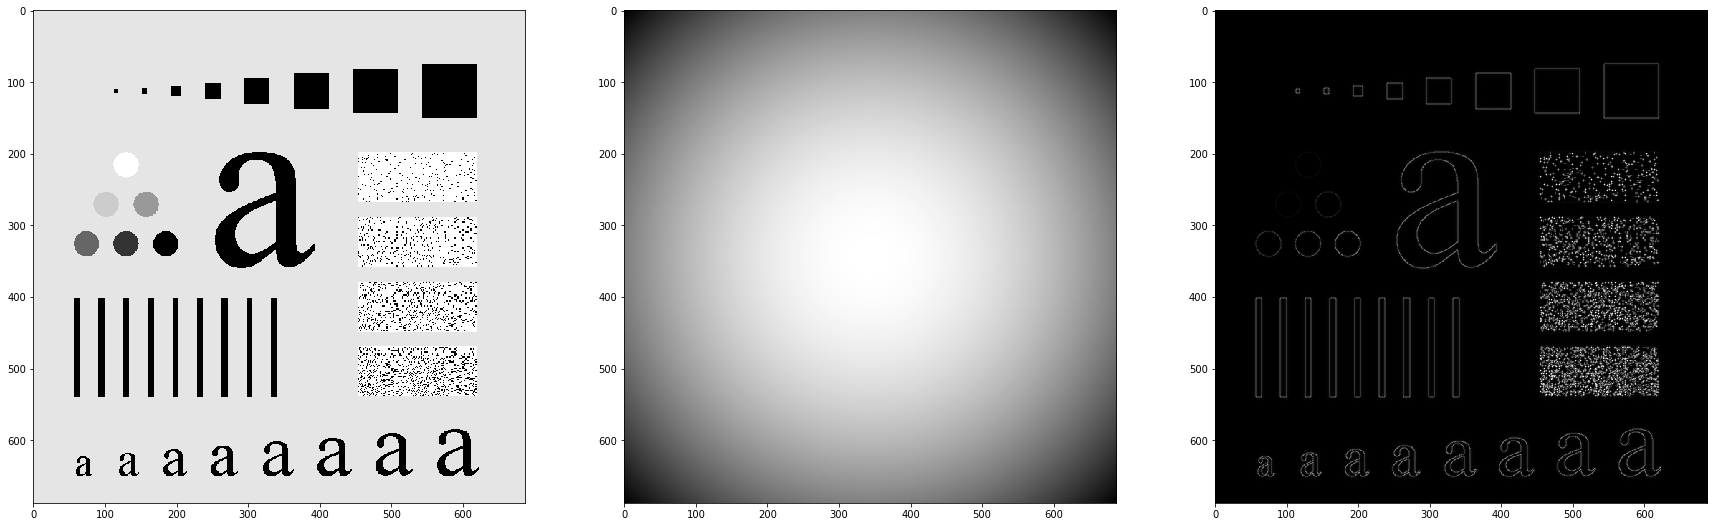

In [13]:
laplace("pictures/4chars.tif")

## Задание 5

В разделе 4.9.5 книги “Цифровая обработка изображений” рассматривается применение гауссова фильтра высоких частот для повышения контрастности снимка грудной клетки. Постройте самостоятельно изображения, представленные на рисунке 4.59 (б)-(г). 

Исходное изображение находится в файле `4chest.tif`

Гауссов фильтр высоких частот определяется выражением:
$$ H(u,v) = 1 - e^{-D^2(u,v)/2D_0^2} $$

In [14]:
def gay(link, D0):
    image = color.rgb2gray(io.imread(link))
    
    image_fft = fftpack.fft2(image)
    image_fft_shifted = fftpack.fftshift(image_fft)
    matrix1, matrix2 = np.meshgrid(np.arange(0, image.shape[1]), np.arange(0, image.shape[0]))
    mask = np.vectorize(lambda x, y: 1 - np.e ** (-((x - image.shape[1] // 2) ** 2 + (y - image.shape[0] // 2) ** 2) / (2 * D0 ** 2)))(matrix1, matrix2)
    
    image_mul_fun = mask * image_fft_shifted
    image_fft_result = fftpack.ifftshift(image_mul_fun)
    image_result = fftpack.ifft2(image_fft_result).real
    
    image_c_mul_fun = (0.5 + 0.75 * mask) * image_fft_shifted
    image_c_fft_result = fftpack.ifftshift(image_c_mul_fun)
    image_c_result = fftpack.ifft2(image_c_fft_result).real
    
    image_eq_result = exposure.equalize_hist(image_c_result)
    
    _, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 30))
    ax[0].imshow(image, cmap="gray")
    ax[1].imshow(image_result, cmap="gray")
    ax[2].imshow(image_c_result, cmap="gray")
    ax[3].imshow(image_eq_result, cmap="gray")

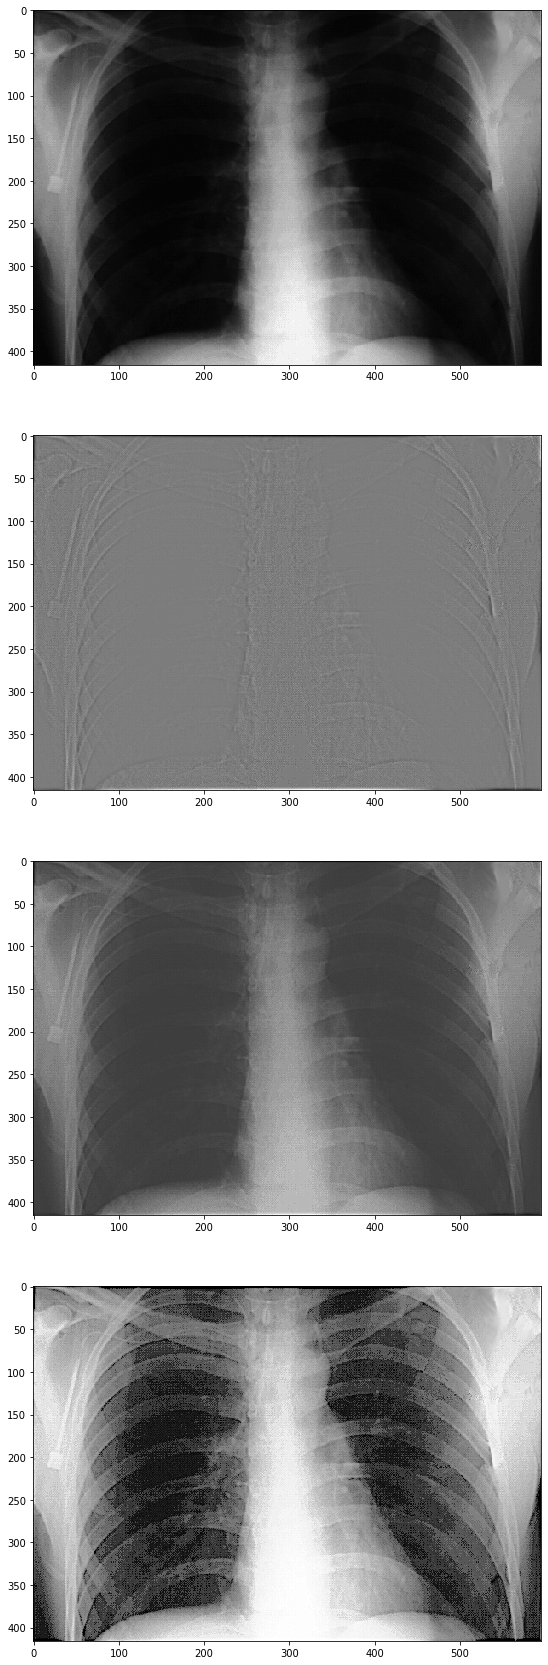

In [15]:
gay("pictures/4chest.tif", 40)